# **A FAZER**

- MELHORAR TODOS OS CAPITULOS
- INCLUIR MAIS REPORTS
- METER AS COISAS NO GIT
- FAZER UMA LEITURA DOS DADOS APRESENTADOS PELOS GRAFICOS

# Projeto Final - Análise Exploratória de Dados
## Dataset: TMDB 1M Movies Dataset

**Autor:** *Lucas Machadinho Martins*  
**Email do Autor:** *a79294@ualg.pt*  
**Curso:** *ANÁLISE DE DADOS E VISUALIZAÇÃO DA INFORMAÇÃO*  

---

### Objetivo do Projeto
O objetivo deste trabalho é realizar uma **análise exploratória de dados (EDA)** sobre um dataset, cujo escolhido dataset foi "Full TMDB Movies Dataset 2024 (1M Movies)", proveniente do website Kaggle, de filmes da **TMDB (The Movie Database)**, contendo cerca de **1 milhão de registos**.  

Este trabalho irá cobrir diversos aspestos, dos quais se destacam:

- Limpeza e preparação dos dados  
- Transformações relevantes  
- Análises uni e multivariadas  
- Visualizações gráficas  
- Estudo com séries temporais 
- Construção de um **dashboard interativo** com a biblioteca `panel`
---



## 2. Importação de bibliotecas e Código de Ajuda

In [81]:
from helper_functions import *
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import *
import numpy as np
from collections import Counter
import ast
from tqdm import tqdm
import json

As bibliotecas e outro código útil está dentro do ficheiro python "helper_functions.py". Estas serão uteis para a correta execução dos códigos seguintes, sendo que têm a seguinte utilidade:
- Pandas:  fornece estruturas de dados rápidas, flexíveis e expressivas, projetadas para tornar o trabalho com dados relacionais fácil e intuitivo. Permite instanciar objetos de leitura e apresentação dos dados de um dataset, incluindo manipular os mesmos.
- Kaggle:  API offical do Kaggle. Utilizado neste trabalho para descarregar o Dataset automaticamente, se o mesmo não estiver presente no diretorio do trabalho
- Requests: Permite realizar requests HTTP de forma bastante intuitiva. Será necessário para interação com API's externas, como por exemplo, OMDB API (Open Movie Database)

## 3. Variáveis Globais e Download do Dataset

In [89]:
AMOUNT_RECORDS = 300

FILE_PATH = 'TMDB_movie_dataset_v11.csv'
DATASET_NAME = 'asaniczka/tmdb-movies-dataset-2023-930k-movies'

Estas variáveis são importantes para a incialização do projeto:
- AMOUNT_RECORDS -> Esta variável é o que define a quantidade de registos a serem lidos do Dataset. Devido à sua dimensão, 500MB (+- 1 milhão de registos), operações com a totalidade dos registos demoram bastante tempo. **Se prentender fazer a extração total do dataset, o número total de registos é 1314285. Não é recomendado, dado que irá demorar imenso tempo a carregar a informação e alguns gráficos poderão perder a sua integridade visual.**
- FILE_PATH -> Determina o diretório do Dataset, como também o nome do ficheiro a ser utilizado
- DATASET_NAME -> Utilizado em conjunto com a variável "FILE_PATH", determina o sufixo do URL do dataset no website do Kagle 

In [90]:
#download_file_if_not_exists(FILE_PATH, DATASET_NAME)

O método acima verifica que se o ficheiro localizado na variável "FILE_PATH" já existe; se existe, não faz nada - caso contrário, é feito um request ao Dataset do Kagle, localizando-o através da variável "DATASET_NAME"

# 4. Limpeza e Analise dos dados

Nesta etapa serão realizadas as seguintes tarefas:
- Verificação e tratamento de valores em falta
- Remoção de duplicados
- Conversão de tipos de dados
- Ajuste de colunas (nomes, formatos)

In [91]:
df = pd.read_csv(FILE_PATH, nrows=5)

O primeiro passo numa analise exploratoria de dados comeca com a verificacao do tipo e quantidade de dados estamos a lidar. Devemos apenas analisar dados relevantes e "livrarmos" dos restantes. Comecamos por carregar alguns registos e analisar os mesmos. Ora vejamos:

In [92]:
df.shape

(5, 24)

O metodo **"shape"** do Pandas ajuda a compreender a dimensao dos dados. Como podemos ver, estamos a lidar com um Dataframe de **5 registos**, composto por **24 colunas**.

In [93]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5 non-null      int64  
 1   title                 5 non-null      object 
 2   vote_average          5 non-null      float64
 3   vote_count            5 non-null      int64  
 4   status                5 non-null      object 
 5   release_date          5 non-null      object 
 6   revenue               5 non-null      int64  
 7   runtime               5 non-null      int64  
 8   adult                 5 non-null      bool   
 9   backdrop_path         5 non-null      object 
 10  budget                5 non-null      int64  
 11  homepage              5 non-null      object 
 12  imdb_id               5 non-null      object 
 13  original_language     5 non-null      object 
 14  original_title        5 non-null      object 
 15  overview              5 non

O metodo **"info"** do Pandas ajuda a compreender a tipologia dos dados; Devolve um sumario com as colunas do Dataframe com varia informacao - a sua posicao nos headers das colunas, o nome da coluna, quantidade de registos sem informacao em dada coluna, e o tipo de dados da coluna. Como podemos ver, grande parte das colunas é do tipo "object". Isto quer dizer que essas colunas guardam texto ou entao varios tipos de dados.
O parametro **"verbose"** indica ao metodo se deve devolver um sumario inteiro ou mais reduzido.

In [94]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 24 entries, id to keywords
dtypes: bool(1), float64(2), int64(5), object(16)
memory usage: 1.0+ KB


In [95]:
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


Vamos agora tentar nos livrar de colunas irrelevantes. Para tal, podemos usar o metodo **"drop"** para apagar informacao e aplicar o parametro **"axis=1"** para indicar que estamos a falar de colunas e nao de linhas;


- **backdrop_path**: contem um URL para os backdrop dos filmes do Dataset. Irrelevante para estatistica
- **homepage**: contem um URL para a pagina oficial dos filmes do Dataset. Irrelevante para estatistica
- **overview**: contem um resumo dos filmes do Dataset. Nao é necessariamente irrelavante, mas visto que o Dataset ja contem bastantes outras colunas informativa, podemos nos livrar.
- **poster_path**: contem um URL para os poster dos filmes do Dataset. Irrelevante para estatistica
- **tagline**: contem uma pequena frase associada aos filmes do Dataset. Nao é necessariamente irrelavante, mas visto que o Dataset ja contem bastantes outras colunas informativa, podemos nos livrar.

In [96]:
colunas_para_remover = [
    'backdrop_path', 
    'homepage', 
    'overview', 
    'poster_path', 
    'tagline',
    'adult' 
]

coluna_filtro = 'adult'

todas_colunas = df.columns.tolist()


colunas_para_carregar = [c for c in todas_colunas if c not in colunas_para_remover]

if coluna_filtro not in colunas_para_carregar:
    colunas_para_carregar.append(coluna_filtro)

tamanho_chunk = 100000
chunk_processados = []

for chunk in pd.read_csv(FILE_PATH, usecols=colunas_para_carregar, chunksize=tamanho_chunk):
    
    chunk_filtrado = chunk[chunk[coluna_filtro] != True]
    
    if coluna_filtro in colunas_para_remover:
        chunk_filtrado = chunk_filtrado.drop(columns=[coluna_filtro])
        
    chunk_processados.append(chunk_filtrado)

df = pd.concat(chunk_processados, ignore_index=True)
qtd_registos = f"{len(df):,}".replace(",", " ")

print(f"Foram carregados {qtd_registos} registos para o dataframe final.")

Foram carregados 1 197 104 registos para o dataframe final.


Em vez de carregar o dataset inteiro para a memória (o que faria o computador travar), usamos a técnica de leitura em lotes (chunking). Além disso, dissemos ao Pandas para ignorar as colunas grandes e inúteis logo no início (usecols), poupando imensa memória.

A parte mais importante é a limpeza dos filmes adultos: carregamos a coluna adult só para o chunk (lote) que estamos a analisar, usamos essa coluna para remover as linhas indesejadas (True) e, assim que o filtro termina, a própria coluna **"adult"** é descartada por não ser mais necessária. No final, juntamos todos os chunks limpos de volta num único DataFrame pronto a usar.

In [97]:
df = df.drop_duplicates(keep="first")

O metodo **"drop_duplicates"** do Pandas devolve o Dataframe com os registos duplicados apagados. Percorre todas as colunas e se existir mais do que um registos com exatamente os mesmos valores, apaga-os. Util para reduzir a dimensao "desnecessaria" de um Dataframe. 

Com o parametro **"keep="first""** estamos a indicar ao metodo para apagar todos os registos duplicados, mantendo a primeira occorrencia. Felizmente, este Dataset nao contem registos duplicados, portanto nao é algo com que temos que preocupar.

In [98]:
registo_encontrado = df[df['id'] == 1407985]

registo_encontrado

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,keywords
745356,1407985,babben: the movie,0.0,0,Released,NaN,4999999999,999,100,NaN,en,babben: the movie,0.6,NaN,NaN,NaN,NaN,NaN


Como ja podemos reparar, os dados deste Dataset nao sao perfeitos; O dataset, **"TMDB_movie_dataset_v11"** contem mais do que 1 milhao de filmes encontrados na base de dados de filmes e programas de TV organizada pela comunidade, no site "The Movie Database". Todos os dados sao adicionados por utilizadores desde 2008, e mesmo por causa disso existem muitas inconsistencias. Se qualquer pessoa pode adicionar filmes a base de dados, pode haver muita informacao falsa. 

Vejamos o caso acima: o filme nem sequer pagina no IDMB, sem votos e classificacoese e no entanto supostamente teve uma receita de "Quatro bilhões, novecentos e noventa e nove milhões, novecentos e noventa e nove mil, novecentos e noventa e nove" dolares. Obviamente isto se trata de informacao falsa. Portanto, vamos fazer a seguinte limpeza:

In [99]:
filtro = (
    (df['vote_count'] == 0) & 
    (df['status'] == 'Released') & 
    (pd.isna(df['imdb_id']) | (df['imdb_id'] == '')) 
)

indices_para_remover = df[filtro].index

filmes_eliminados = len(indices_para_remover)
filmes_formatados = f"{filmes_eliminados:,}".replace(",", " ")

df.drop(indices_para_remover, inplace=True) 

print(f"Foram eliminados {filmes_formatados} filmes utilizando o método .drop().")

Foram eliminados 498 879 filmes utilizando o método .drop().


## Análise Estatística e Transformação dos Dados

Neste capítulo são analisadas relações entre variáveis através de:
- Correlações
- Gráficos de dispersão
- Tabelas dinâmicas (pivot tables)
- Cruzamentos entre variáveis (crosstabs)

Neste capitulo também são aplicadas transformações necessárias para a análise, tais como:
- Criação de novas variáveis (ex.: lucro = receita - orçamento)
- Extração de ano a partir da data
- Categorização de géneros ou países


In [100]:
pd.options.mode.chained_assignment = None
tqdm.pandas()

def get_director(imdb_id: str):
    if pd.isna(imdb_id) or not str(imdb_id).startswith("tt"):
        return "Invalid IMDb ID"

    url = f'https://api.imdbapi.dev/titles/{imdb_id}'
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.RequestException as e:
        return f"HTTP error: {e}"
    data = response.json()
    if 'directors' not in data or not data['directors']:
        return "Sem info"
    director_names = [d.get("displayName", "Unknown") for d in data['directors']]
    return ", ".join(director_names)

print("A aplicar a função de API para obter os realizadores nos primeiros 300 registos...")

if 'Director' not in df.columns:
    df['Director'] = pd.NA

df.loc[df.index[:300], 'Director'] = df['imdb_id'].iloc[:300].progress_apply(get_director)

print("Realizadores obtidos e adicionados aos primeiros 300 registos.")

if 'title' in df.columns:
    cols = list(df.columns)
    if 'Director' not in cols:
        cols.append('Director') 
        
    if 'Director' in cols:
        cols.remove('Director')
    title_index = cols.index('title')
    cols.insert(title_index + 1, 'Director')
    df = df[cols]

A aplicar a função de API para obter os realizadores nos primeiros 300 registos...


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:53<00:00,  2.64it/s]

Realizadores obtidos e adicionados aos primeiros 300 registos.


A coluna **"imdb_id"** é das colunas mais essenciais do Dataset quando se pensa em trabalhar com dados externos. Funciona como uma chave estrangeira que permite ligar o dataset local a API's externas. Ele é a ponte que permite usar a API para obter atributos que dataset não contém (como o nome do realizador, a lista completa de atores, sinopse detalhada, etc.). É através do imdb_id que se consegue fazer chamadas a APIs para enriquecer o dataset.

No codigo acima, utilizando a chave imdb_id de cada registo fazemos uma chamada API "imdbapi.dev" para obtermos o realizador de cada filme e adicionamo-los ao Dataframe como uma coluna, podendo assim fazer outros tipos de estudos sobre o Dataset dos filmes. No entanto, devido ao custo operacional de realizar uma chamada a API externa, aplicamos apenas aos primeiros 300 registos do Dataframe, de forma a nao levar imenso tempo.

In [88]:
df[['id', 'title', 'Director','imdb_id',]].head(300)

,id,title,Director,imdb_id
0,27205,Inception,Christopher Nolan,tt1375666
1,157336,Interstellar,Christopher Nolan,tt0816692
2,155,The Dark Knight,Christopher Nolan,tt0468569
3,19995,Avatar,James Cameron,tt0499549
4,24428,The Avengers,Joss Whedon,tt0848228


Vejamos que tipo de informacao adicional se poderia extrair utilizando a chave da imdb_id:

In [14]:
imdb_id_exemplo = 'tt1375666'
url_base = 'https://api.imdbapi.dev/titles/'
url_exemplo = f'{url_base}{imdb_id_exemplo}'

response = requests.get(url_exemplo)
data = response.json()
print(json.dumps(data, indent=4, ensure_ascii=False))

{
    "id": "tt1375666",
    "type": "movie",
    "primaryTitle": "Inception",
    "primaryImage": {
        "url": "https://m.media-amazon.com/images/M/MV5BMjAxMzY3NjcxNF5BMl5BanBnXkFtZTcwNTI5OTM0Mw@@._V1_.jpg",
        "width": 700,
        "height": 1037
    },
    "startYear": 2010,
    "runtimeSeconds": 8880,
    "genres": [
        "Action",
        "Adventure",
        "Sci-Fi",
        "Thriller"
    ],
    "rating": {
        "aggregateRating": 8.8,
        "voteCount": 2757269
    },
    "metacritic": {
        "score": 74,
        "reviewCount": 42
    },
    "plot": "A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster.",
    "directors": [
        {
            "id": "nm0634240",
            "displayName": "Christopher Nolan",
            "alternativeNames": [
                "Chris Nolan"
            ],
    

### Cálculo de lucro

In [15]:
df['revenue_num'] = df['revenue'].replace(r'[\.\$\s]', '', regex=True).astype(float)
df['budget_num']  = df['budget'].replace(r'[\.\$\s]', '', regex=True).astype(float)

df['revenue_num'] = df['revenue_num'].fillna(0)
df['budget_num']  = df['budget_num'].fillna(0)

df['profit_num'] = df['revenue_num'] - df['budget_num']

df['revenue'] = df['revenue_num'].apply(format_currency)
df['budget']  = df['budget_num'].apply(format_currency)
df['profit']  = df['profit_num'].apply(format_currency)

df[['title', 'budget', 'revenue', 'profit', 'release_date']]

,title,budget,revenue,profit,release_date
0,Inception,160.000.000 $,825.532.764 $,665.532.764 $,2010-07-15
1,Interstellar,165.000.000 $,701.729.206 $,536.729.206 $,2014-11-05
2,The Dark Knight,185.000.000 $,1.004.558.444 $,819.558.444 $,2008-07-16
3,Avatar,237.000.000 $,2.923.706.026 $,2.686.706.026 $,2009-12-15
4,The Avengers,220.000.000 $,1.518.815.515 $,1.298.815.515 $,2012-04-25
...,...,...,...,...,...
1197099,Green mature women from the widow's pink salon,0 $,0 $,0 $,1995-01-01
1197100,SOUNDS LIKE SHIT the story of Hi-STANDARD,0 $,0 $,0 $,2018-11-10
1197101,Entre Telas e Janelas,0 $,0 $,0 $,2021-05-09
1197102,Youth Peony Lantern,0 $,0 $,0 $,1993-08-21


In [16]:
df = df.drop(columns=['revenue_num', 'budget_num', 'profit_num'])

O lucro é o valor monetário que as empresas envolvidas no desenvolvimento do filme realmente "levam para casa". 
É calculado subtraindo o orçamento da receita de um dado filme, e permite-nos ter uma noção mais realista do quão benéfico um dado filme foi,
num ponto de vista financeiro

C:\Users\lucas\AppData\Local\Temp\ipykernel_30148\561176759.py:17: UserWarning: Glyph 65377 (\N{HALFWIDTH IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65377 (\N{HALFWIDTH IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


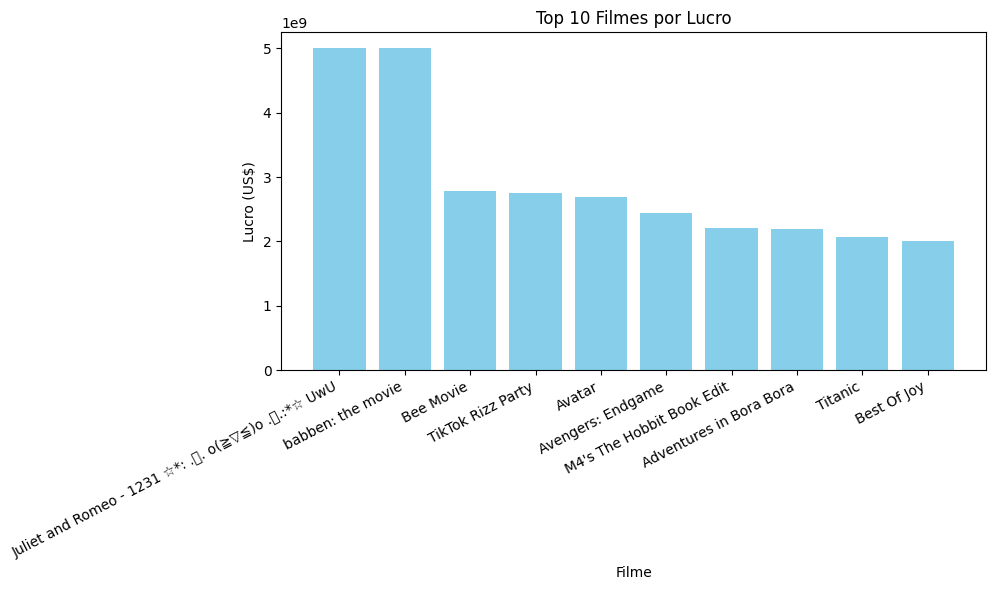

In [17]:
df['profit'] = df['profit'].astype(str) \
                              .str.replace('.', '', regex=False) \
                              .str.replace('$', '', regex=False)

df['profit'] = pd.to_numeric(df['profit'], errors='coerce')

df_sorted = df.sort_values(by='profit', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['title'], df_sorted['profit'], color='skyblue')

plt.xticks(rotation=27.5, ha='right')
plt.title('Top 10 Filmes por Lucro')
plt.xlabel('Filme')
plt.ylabel('Lucro (US$)')

plt.tight_layout()
plt.show()

Calculando o lucro dos registos permite-nos realizar estudos diversificados, como por exemplo os top 10 filmes com maior lucro. 
No gráfico acima, a escala de Y, onde está o lucro, está numa escala de **500 millhoes US$**.

C:\Users\lucas\AppData\Local\Temp\ipykernel_30148\2649642589.py:26: UserWarning: Glyph 65377 (\N{HALFWIDTH IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65377 (\N{HALFWIDTH IDEOGRAPHIC FULL STOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


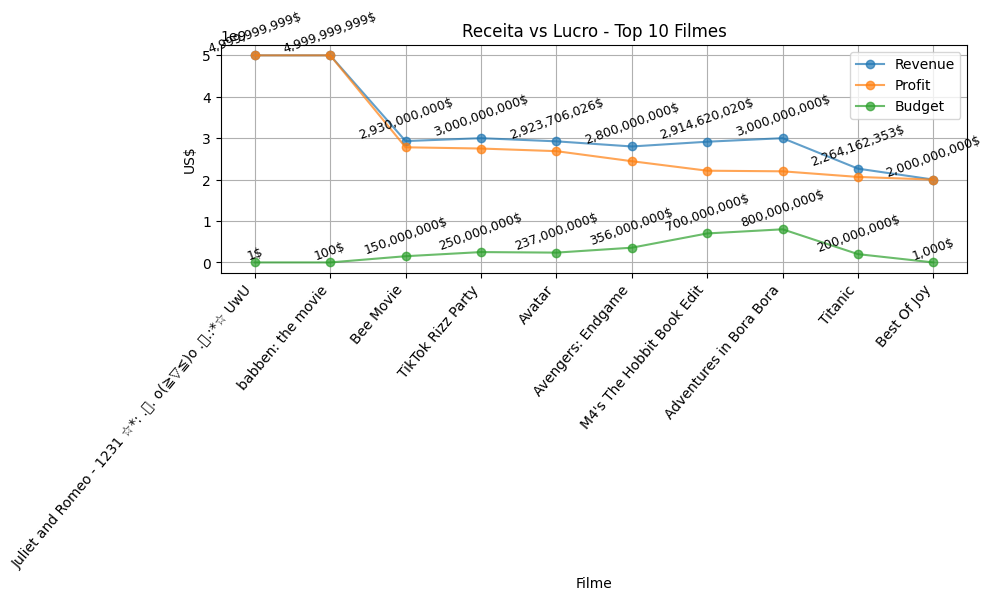

In [18]:
df['revenue'] = df['revenue'].str.replace('.', '', regex=False).str.replace('$', '', regex=False)
df['budget'] = df['budget'].str.replace('.', '', regex=False).str.replace('$', '', regex=False)

df['revenue'] = pd.to_numeric(df['revenue'])
df['budget'] = pd.to_numeric(df['budget'])
df['profit'] = df['revenue'] - df['budget']

df_sorted = df.sort_values(by='profit', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['title'], df_sorted['revenue'], marker='o', label='Revenue', alpha=0.7)
plt.plot(df_sorted['title'], df_sorted['profit'], marker='o', label='Profit', alpha=0.7)
plt.plot(df_sorted['title'], df_sorted['budget'], marker='o', label='Budget', alpha=0.7)

for i, value in enumerate(df_sorted['revenue']):
    plt.text(i, value, f"{value:,.0f}$", ha='center', va='bottom', fontsize=9, rotation=20)
for i, value in enumerate(df_sorted['budget']):
    plt.text(i, value, f"{value:,.0f}$", ha='center', va='bottom', fontsize=9, rotation=20)

plt.xticks(rotation=50, ha='right')
plt.title('Receita vs Lucro - Top 10 Filmes')
plt.xlabel('Filme')
plt.ylabel('US$')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Colocando os valores da receita, lucro e orçamento num gráfico de séries facilmente conseguimos observar que os top 10 filmes mais rentáveis de sempre, mesmo tendo um orçamento elevado,
o seu lucro é muito mais superior. 
Podemos fazer essa dedução mesmo sem termos a barra de lucro presente; quanto maior for a diferença vertical entre o ponto de um orçamento e o ponto de receita, deduzimos que o lucro será maior.

Analisando o gráfico, conseguimos concluir que o filme com mais rentável de sempre foi o Avatar (2012).

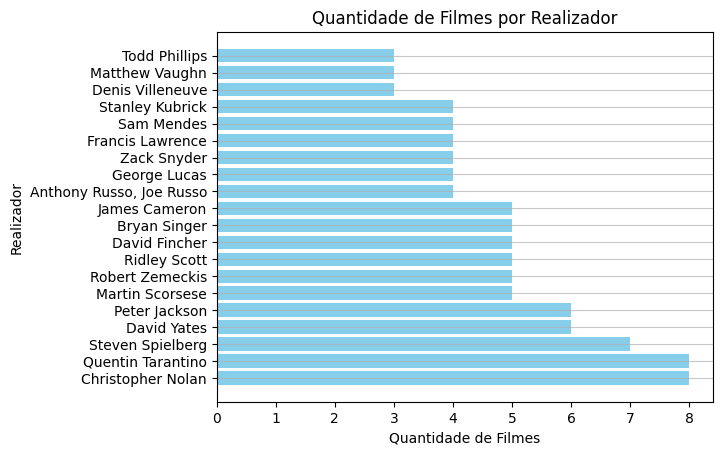

In [19]:
director_count = df['Director'].value_counts().head(20)

plt.barh(director_count.index, director_count.values, color='skyblue')

plt.title('Quantidade de Filmes por Realizador')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Realizador')
plt.grid(axis='y', alpha=0.7)

plt.show()

Gráficos de barras são ótimos para visualizar informação sobre contagens, podendo realizar análise rápidas sobre os mesmos. No gráfico acima, estamos a fazer um levantamento dos 10 primeiros realizadores que aparecem no Dataset, e por sua vez vemos a quantidade de filmes que cada um já realizou. Podemos concluir que o realizador "Christopher Nolan" é dos mais presentes no Dataset, ou pelo menos da extração feita do Dataset.

C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


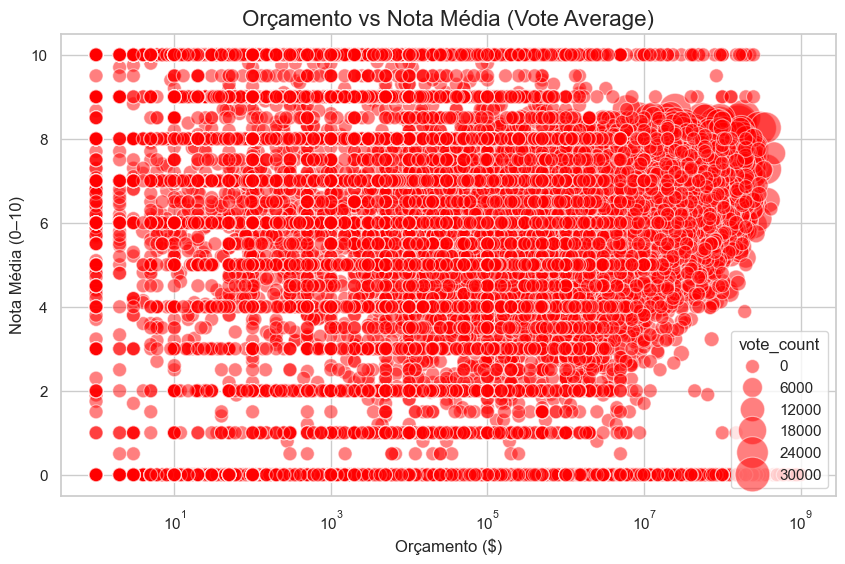

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="budget",
    y="vote_average",
    size="vote_count",
    sizes=(100, 700),
    alpha=0.5,
    color="red"
)

plt.title("Orçamento vs Nota Média (Vote Average)", fontsize=16)
plt.xscale("log")   # orçamento varia muito
plt.xlabel("Orçamento ($)")
plt.ylabel("Nota Média (0–10)")
plt.show()

## Análise do Scatterplot: Orçamento vs Nota Média (Vote Average)

### O que o gráfico mostra

*   **Eixo X (Orçamento)**: está em escala logarítmica. Se não estivesse nesta escala, irião aparecer imensos números
*   **Eixo Y (Nota Média)**: varia entre aproximadamente 6.0 e 8.5 (escala de 0 a 10).
*   **Tamanho dos pontos**: indica `vote_count` (quanto maior a bola, mais votos o filme recebeu).

***

### Padrões observados
1.  **Distribuição das notas**
    *   A maioria dos filmes está concentrada entre 6.5 e 8.0.
    *   Poucos filmes têm notas abaixo de 6.0 ou acima de 8.5.

2.  **Relação entre orçamento e nota média**
    *   Não há correlação clara entre orçamento e nota média.
    *   Filmes com orçamento alto não garantem notas mais altas.
    *   Filmes com orçamento baixo também podem ter boas avaliações.

3.  **Número de votos (tamanho das bolas)**
    *   Filmes com mais votos (bolas maiores) tendem a estar na faixa de orçamento médio a alto.
    *   Filmes com poucos votos aparecem menores e estão espalhados por todas as faixas de orçamento.

Os **scatterplots** (ou gráficos de dispersão) são úteis para visualizar a relação entre duas ou mais variáveis numéricas, ajudando a identificar padrões, tendências, correlações e valores atípicos (outliers). No gráfico acima conseguimos relacionar 3 tipos de dados: Orçamento, Classificação e Quantidade de Votos. O valores são bastante concentrados, tendo poucos outliers.

KeyError: 358029

C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8546 (\N{ROMAN NUMERAL THREE}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27171 (\N{CJK UNIFIED IDEOGRAPH-6A23}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 33775 (\N{CJK UNIFIED IDEOGRAPH-83EF}) missing fr

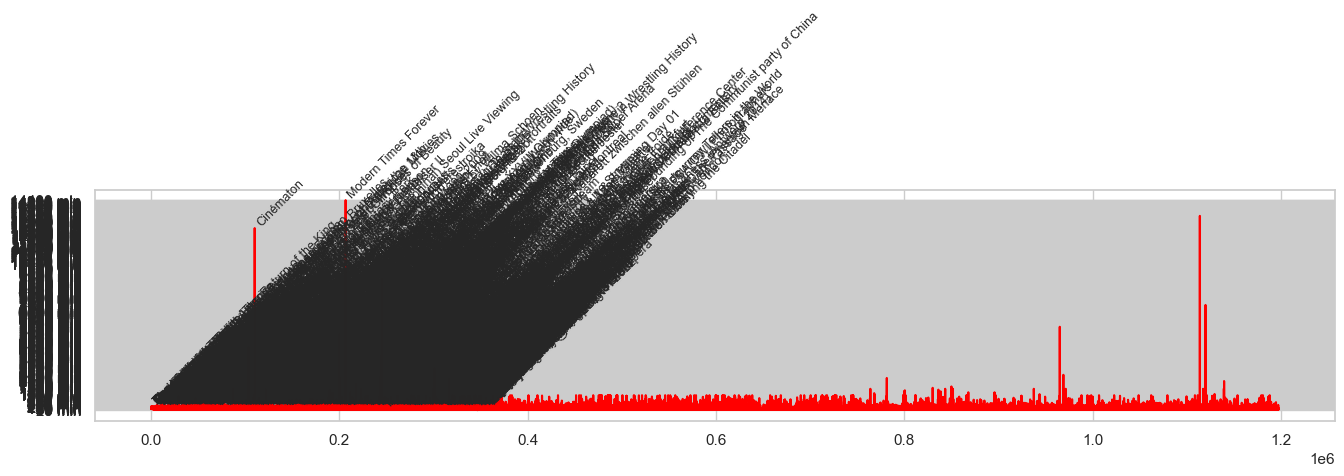

In [21]:
plt.figure(figsize=(16,3))
plt.fill_between(df.index, df['runtime'], color='lightcoral', alpha=0.5)
plt.plot(df['runtime'], color='red')

max_runtime = df['runtime'].max()
plt.yticks(np.arange(0, max_runtime + 20, 20))

def format_minutes(x, pos):
    return f'{int(x)} min'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_minutes))

for i, runtime in enumerate(df['runtime']):
    if runtime > 200:
        plt.text(i, runtime + 2, df.loc[i, 'title'], rotation=45, ha='left', va='bottom', fontsize=9)

plt.title('Duração dos Filmes (Runtime)')
plt.xlabel('Filmes')
plt.ylabel('Duração (minutos)')
plt.grid(True)
plt.show()


## **Análise do Gráfico de Área: Duração dos Filmes (Runtime)**

### **O que o gráfico mostra**

*   **Eixo X (Filmes)**: representa os filmes.
*   **Eixo Y (Duração em minutos)**: varia de 0 até aproximadamente **220 minutos**.
*   **Área preenchida em vermelho**: indica a distribuição das durações ao longo dos filmes.
*   **Linha vermelha**: mostra a variação da duração de cada filme.

***

### **Padrões observados**

1.  **Faixa predominante de duração**
    *   A maioria dos filmes está concentrada entre **80 e 140 minutos**.
    *   Poucos filmes ultrapassam **180 minutos** (outliers).

2.  **Distribuição geral**
    *   Não há tendência clara de aumento ou redução da duração ao longo do índice dos filmes.
      
3.  **Outliers**
    *   Existem alguns picos acima de **200 minutos**, indicando filmes excepcionalmente longos. Nomeadamente o filme "The Lord of the Rings: The Return of the King" e o filme "The Godfather: Part II" destacam-se por ulrapassar este valor.
    *   Também há alguns pontos abaixo de **100 minutos**, indicando filmes curtos ou possivelmente especiais/documentários.

4.  **Densidade**
    *   A área preenchida mostra que a maior parte do espaço está entre **100 e 140 minutos**, reforçando que essa é a duração típica.

***

Os **Gráficos de área** combinam as propriedades de gráficos de linhas com preenchimento, mostrando tanto tendências como a magnitude absoluta dos valores. São excelentes para visualizar composição ao longo do tempo

In [ ]:
lang_counts = df['original_language'].value_counts()
top_langs = lang_counts.head(5)

percentages = (top_langs / top_langs.sum() * 100).round(1)

fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts = ax.pie(
    top_langs,
    labels=None,
    startangle=90,
    colors=plt.cm.tab20.colors
)

legend_labels = [f"{lang} - {perc}%" for lang, perc in zip(top_langs.index, percentages)]
ax.legend(
    wedges,
    legend_labels,
    title="Idiomas",    bbox_to_anchor=(1, 0, 0.2, 1)
)

plt.title('Distribuição de Filmes por Idioma de Produção')
plt.show()


## **Análise do Gráfico Circular: Distribuição de Filmes por Idioma de Produção**

### **O que o gráfico mostra**

*   **Tipo de gráfico**: Circular (Pie Chart).
*   **Eixo visual**: Cada fatia representa a proporção de filmes por idioma original.
*   **Legenda à direita**: Lista os idiomas com suas respectivas percentagens e cores correspondentes.

Idiomas e percentagens:

*   **en (Inglês)**: 98%
*   **fr (Francês)**: 0,7%
*   **ja (Japonês)**: 0,7%
*   **ko (Coreano)**: 0,3%
*   **it (Italiano)**: 0,3%

***

### **Padrões observados**

1.  **Predominância absoluta do inglês**
    *   O idioma **inglês** domina quase todo o gráfico, representando **98%** dos filmes.
    *   Isso indica que a base de dados é fortemente concentrada em produções de Hollywood e de países cuja lingua nativa é inglês.

2.  **Diversidade mínima**
    *   Os demais idiomas (fr, ja, ko, it e Outros) juntos somam apenas **2,3%**.
    *   Cada um desses idiomas aparece com menos de **1%**, mostrando baixa representatividade.

3.  **Distribuição extremamente desbalanceada**
    *   A fatia azul (inglês) ocupa praticamente todo o círculo.
    *   As outras fatias são tão pequenas que quase não são visíveis no gráfico, reforçando a concentração.
***



Os **Gráficos circulares** representam proporções de um todo, sendo ideais para mostrar como é repartida uma quantidade total entre diferentes categorias.

Mesmo 5 idiomas dominarem o gráfico no que toca ao idioma em que os filmes foram produzidos, grande parte existem inúmeras outras línguas faladas no diálogo destes filmes. Vejamos:

In [ ]:
all_languages = []
for langs in df['spoken_languages']:
    if pd.isna(langs):
        continue
    langs_list = [lang.strip() for lang in langs.split(',')]
    all_languages.extend(langs_list)

language_counts = Counter(all_languages)

language_df = pd.DataFrame(language_counts.items(), columns=['language', 'count'])
language_df = language_df.sort_values(by='count', ascending=False)

table = language_df.set_index('language').T

fig, ax = plt.subplots(figsize=(20,4))

sns.heatmap(table,
            annot=True,
            fmt='d',
            linewidths=1,
            cmap='RdYlGn')

plt.title('Quantidade de Filmes por Idioma Falado')
plt.xlabel('Idioma')
plt.ylabel('Contagem de Filmes')
plt.show()


Ainda assim, o idioma mais falado na extração do Dataset é maioritariamente o inglês. No entanto, a diversidade de idiomas é bastante mais diferenciado.

In [ ]:
df_gen = df.copy()
df_gen['genres'] = df_gen['genres'].apply(
    lambda x: [g.strip() for g in x.split(',')] if pd.notna(x) else []
)
df_gen = df_gen.explode('genres')

df_gen = df_gen[df_gen['genres'] != ""]

genre_popularity = df_gen.groupby('genres')['popularity'].mean().sort_values(ascending=False)

genre_popularity_df = pd.DataFrame(genre_popularity).reset_index()
genre_popularity_df.columns = ['genre', 'popularity_mean']

table = genre_popularity_df.set_index('genre').T

# Plotar heatmap
plt.figure(figsize=(20,4))
sns.heatmap(
    table,
    annot=True,
    fmt='.1f',
    linewidths=1,
    cmap='RdYlGn'
)

plt.title('Popularidade Média por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Popularidade Média')
plt.show()
